# Energy Efficiency of Residential Buildings:

**In this section, predicting the energy efficiency of buildings with machine learning algorithms.**

## Table of Content:

1. Introduction

  + 1.1. Overview of the problem
  + 1.2. Description of the Dataset
  + 1.3. Objective of the project
  + 1.4. Plan of action
  

2. Importing Necessary Libraries  

  + 2.1. Read Data in Google Colab
  + 2.2. Read Data in Jupyter Notebook
  + 2.3. Exploratory Data Analysis [EDA]
  
  
3. Feature Engineering

  + 3.1. Visualisation of Features 
  + 3.1.1. Visualisation of Features before Scaling
  + 3.1.2. Visualisation of Features after Scaling
  

4. Model Traning & Testing without Hyper-Parameters Tuning

  + 4.1. Seperation of Input Features and Output Features
  + 4.2. Creating Useful Functions
  + 4.2.1. Metric Performance Function
  + 4.2.2. Dictionary of Regression Type Machine Learning Models
  + 4.2.3. Model Evaluation Function without Hyper Parameter Tuning
  + 4.3. Model Evaluation Results
  + 4.3.1. Metric Performance for considered Machine Learning Models
  + 4.3.2. Metric Performance for considered Machine Learning Models in Tabular Format (Descending Order) 
  
  
5. Model Traning & Testing with Hyper-Parameters Tuning

  + 5.1. Creating Useful Functions
  + 5.1.1. Model Function with Hyper Parameter Tuning
  + 5.2. Model Evaluation Results
  + 5.2.1. Metric Performance and Best Parameters for Machine Learning Models
  + 5.3. Comparing Selected Model Accuracy with or without Hyper Parameters Tuning
  

6. Final Model Creation

  + 6.1. Training and Testing XGBoost Multi-Regressor Model
  + 6.2. Prediction Using XGBoost Multi-Regressor Model

# Note: For Better Experience, Run this notebook using Google Colab

# 1. Introduction

## 1.1. Overview of the problem

With record high and low temperatures across the globe, it is becoming increasing important to be efficient when it comes to heating and cooling our buildings. Whether you are trying to reduce the cost of your energy bill or you're trying to reduce your carbon footprint, improving the energy efficacy of your building can both save you some money and even help the environment. We will be looking at a data set that can help us with both! 

## 1.2. Description of the Dataset

📌 **Dataset link:**  --->> https://archive.ics.uci.edu/ml/datasets/Energy+efficiency  (excel format)

📌 **Dataset link:**  --->> https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset (csv format)

This data set we will be using is from the University of California, Irvine Machine Learning Repository.

The following is **UCI's information on the data set**:

**Source:**

*The dataset was created by Angeliki Xifara (Civil/Structural Engineer) and was processed by Athanasios Tsanas (Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).*


**Data Set Information:**

*We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.*


**Attribute Information:**

*The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.*

**Specifically:**

+ Relative Compactness
+ Surface Area - m²
+ Wall Area - m²
+ Roof Area - m²
+ Overall Height - m
+ Orientation - 2:North, 3:East, 4:South, 5:West
+ Glazing Area - 0%, 10%, 25%, 40% (of floor area)
+ Glazing Area Distribution (Variance) - 1: Uniform, 2: North, 3: East, 4: South, 5: West
+ Heating Load - kW
+ Cooling Load - kW


## 1.3. Objective of the project

The goal of this project is to create multiple regression models that come up with predictions for both the heating and cooling load. We will take the best performing model.

## 1.4. Plan of action

--> First of all, We will perform Exploratory Data Analysis (EDA), Feature Engineering (FE) and Feature Selection (FS) [if required] using various python based libraries [pandas, numpy etc.] on downloaded data set from the above mentioned link. 
--> We will also use visualization tools [matplotlib, seaborn etc.]to get a better understanding of the data that we are working with. 
--> Afterwords, we will be creating distinct regression models.
--> Finally, We will evaluate these models using distinct perfomance metrics and will select the best performing    (most suitable) model for this specific dataset for predictions of heating load as well as cooling load for residential buildings.

# 2. Importing Necessary Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import  train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

warnings.filterwarnings("ignore")
%matplotlib inline

## 2.1. Read Data in Google Colab:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.csv to ENB2012_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ENB2012_data.csv']))
print(df)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


## 2.2. Read Data in Jupyter Notebook:

In [5]:
# Load csv file
# df = pd.read_csv('ENB2012_data.csv', na_values="na")
# df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# 2.3. Exploratory Data Analysis [EDA]

In [6]:
df.columns = ["Relative Compactness","Surface Area","Wall Area",
                "Roof Area", "Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [7]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.shape

(768, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Observation:
1. There are total 768 rows (Number of Records) and 10 columns.
2. Column Number: 
(i) 1 to 8 --> Feature Columns [Independent Variables/ Input Variables] 
(ii) 9 to 10 --> Target Columns [Dependent Variables/ Output Variables]
3. There are total 2 data types: float64 and int64
4. All Features and Target columns are in numerical format./ No column (Feature/Target) has any categorical value.
5. There is no any missing (na/NULL) value.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [9]:
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

## Observation:

1. As per above observation, we can say that we don't have any Na/NULL Values here so can go further without Removing any rows OR applying any imputation techniques on the dataset 
2. We can see that most of the values are good but Area(s) are bit higher (not on same scale) so we will Normalize our data set further in upcoming steps.

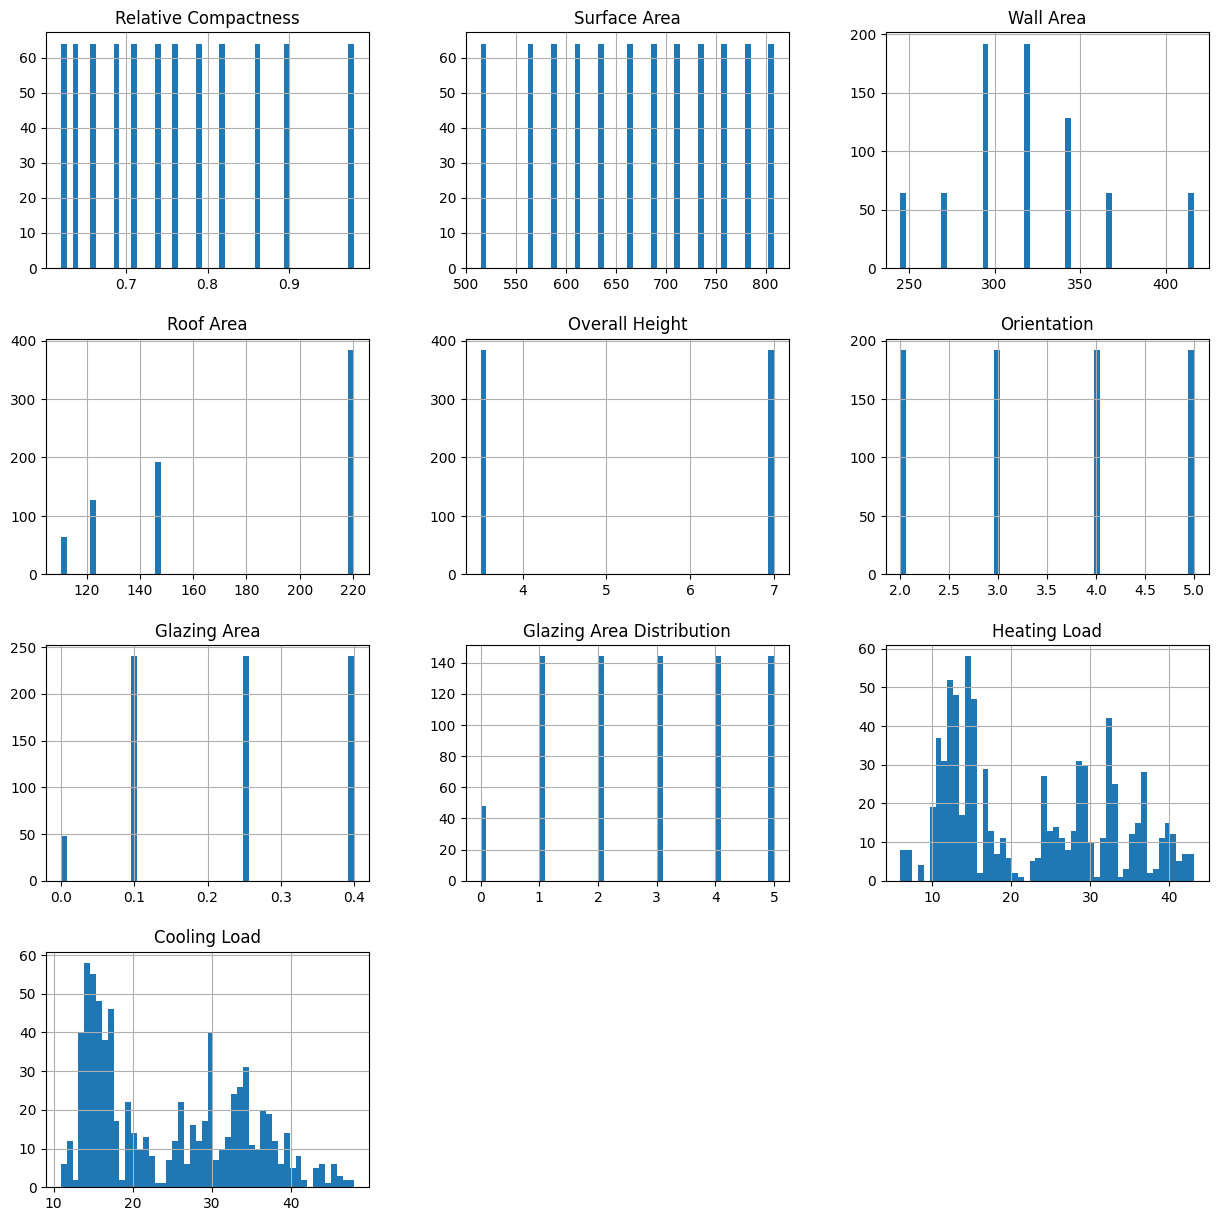

In [10]:
df.hist(figsize=(15,15),bins=50)
plt.show()

## Observation:

1. Here, Data Distribution is very Weird mostly Uniform, continuous and discrete in nature. 


In [11]:
cols = df.columns
cols

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

###  Checking Number of Unique Values: 

In [12]:
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

In [13]:
df['Glazing Area'].unique()

array([0.  , 0.1 , 0.25, 0.4 ])

In [14]:
for c in cols:
    print("{c} Column has {u} unique values in it.".format(c=c,u = np.count_nonzero(df[c].unique())))

Relative Compactness Column has 12 unique values in it.
Surface Area Column has 12 unique values in it.
Wall Area Column has 7 unique values in it.
Roof Area Column has 4 unique values in it.
Overall Height Column has 2 unique values in it.
Orientation Column has 4 unique values in it.
Glazing Area Column has 3 unique values in it.
Glazing Area Distribution Column has 5 unique values in it.
Heating Load Column has 586 unique values in it.
Cooling Load Column has 636 unique values in it.


## Observation:
1. Here,  we can see most of the data is having very repetitive values like Roof Area is only haivng 4 values, Overall Height is only having 2 unique Values, Glazing Area have only 4 unique values.

**Lets Check Correlation between all the Columns:**

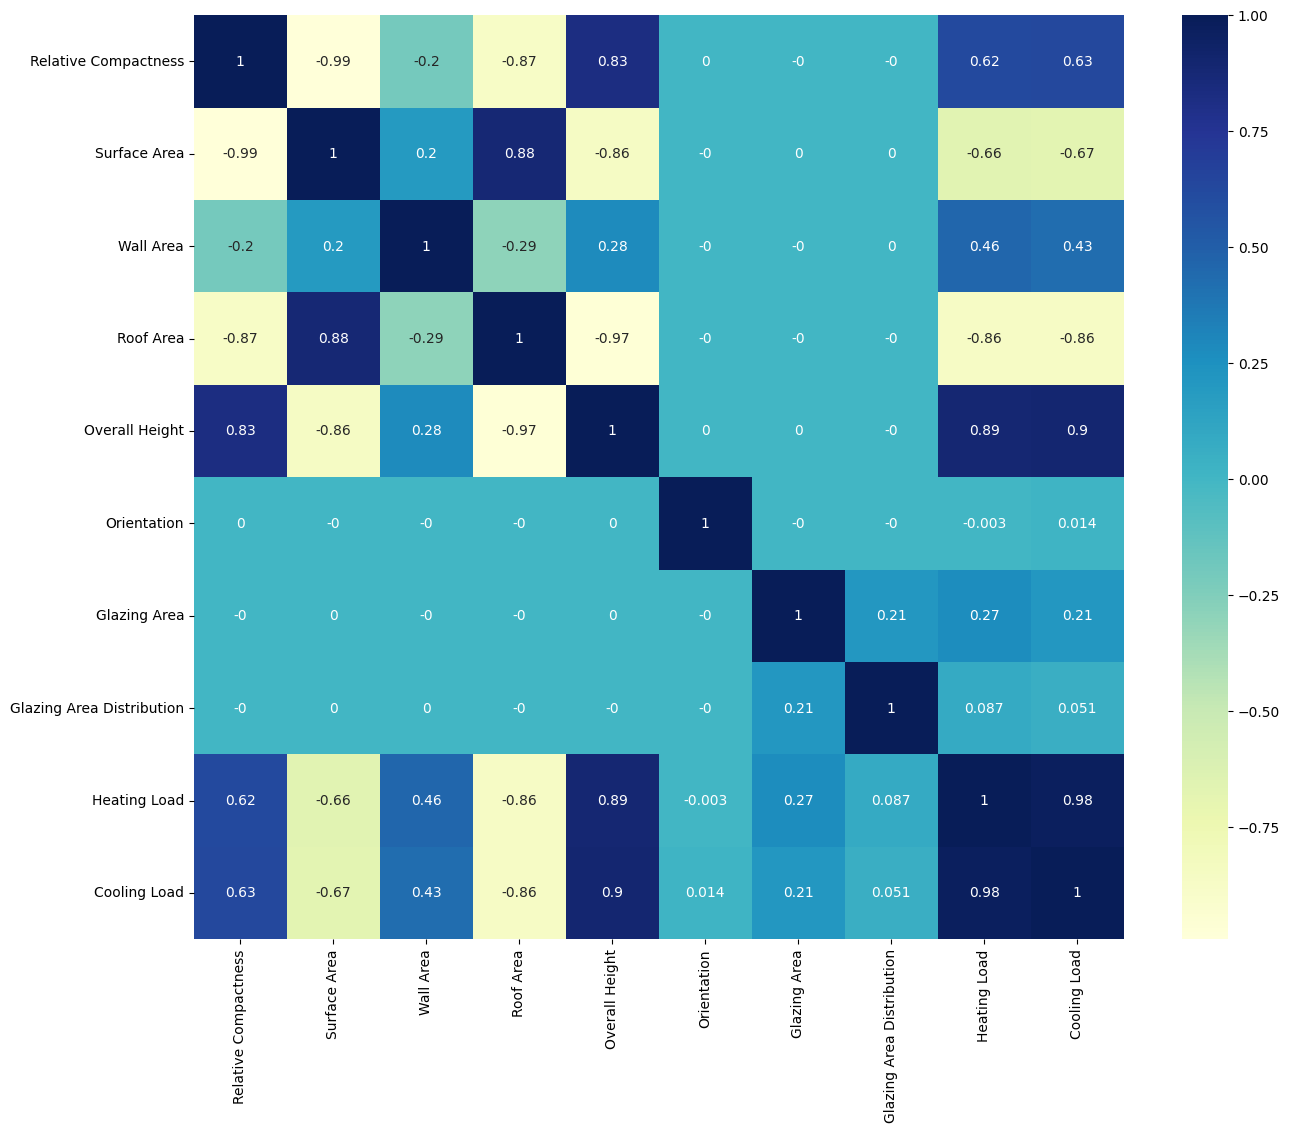

In [15]:
# 1. Pearson correlation coefficient:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(),3), annot=True, cmap="YlGnBu")
plt.show()

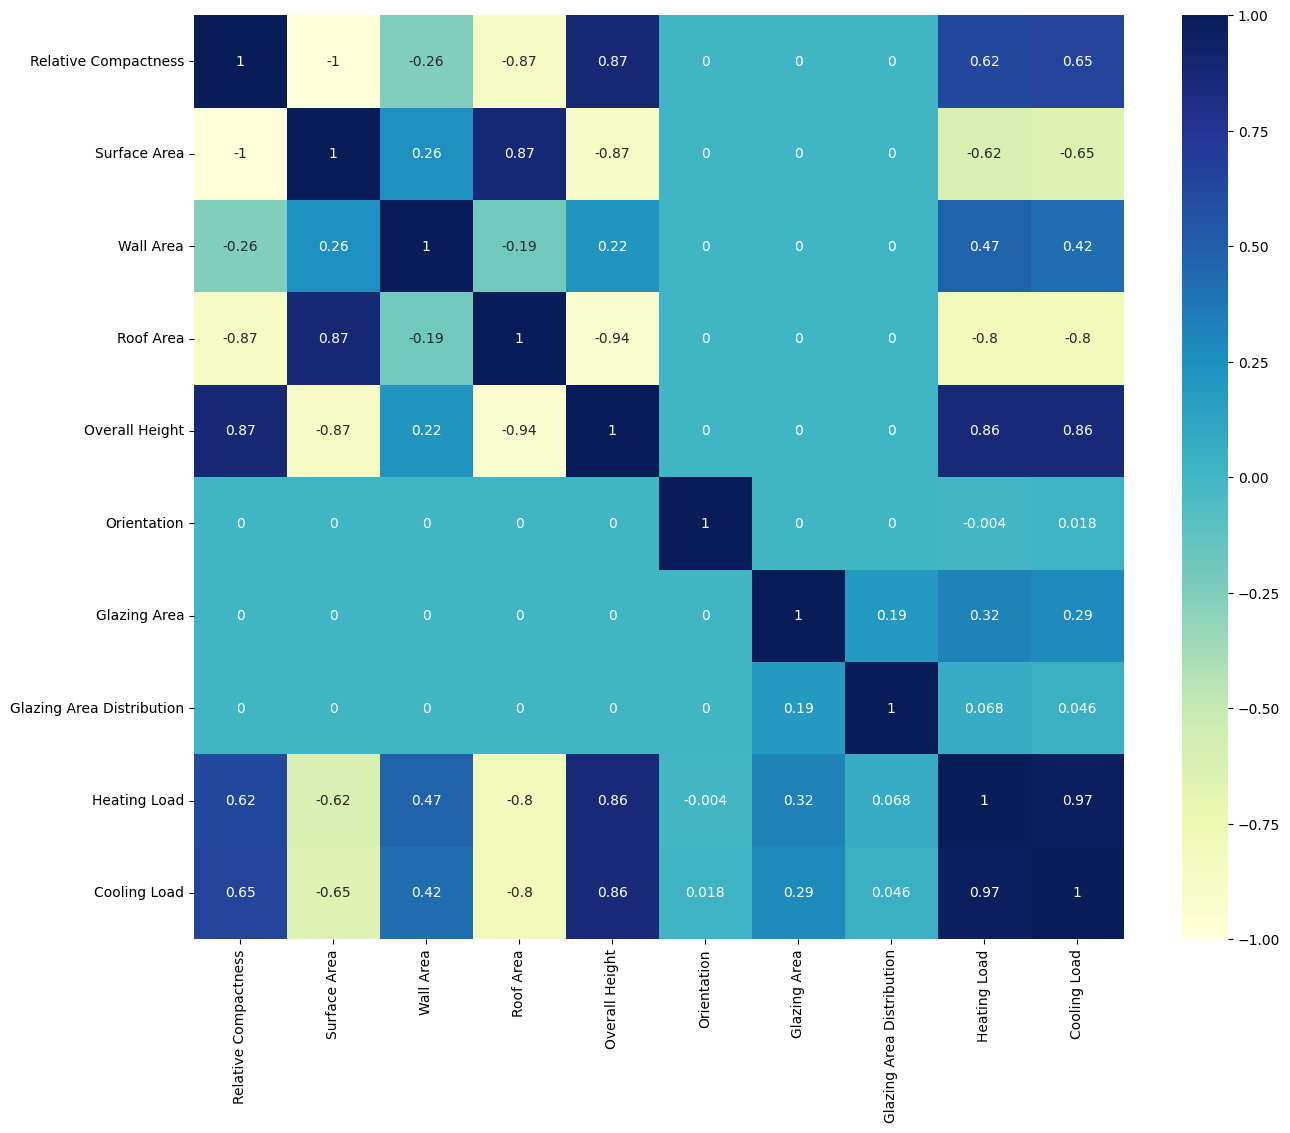

In [16]:
# 2. Spearman's rank correlation coefficient:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(method='spearman'),3), annot=True, cmap="YlGnBu")
plt.show()

## Observation:
1. We Find that **Overall Hieght** is the having Very good positive correlation with both values and **Roof Area** is Highly negative correlation with both Values

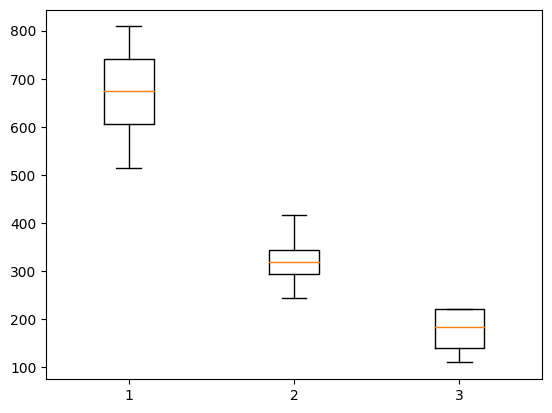

In [17]:
plt.boxplot(df[["Surface Area","Wall Area","Roof Area"]]) # We didn't find any outliears here 
plt.show()

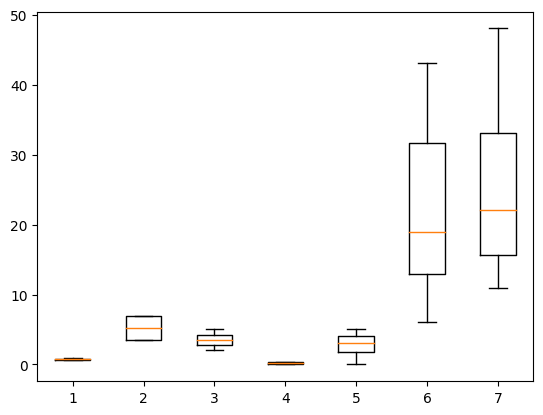

In [18]:
plt.boxplot(df[["Relative Compactness","Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Heating Load", "Cooling Load"]]) # We didn't find any outliears here also 
plt.show()

## Observation:
1. There are no Outliers Here in any Columns. 

# 3. Feature Engineering:

## 3.1. Visualisation of Features:

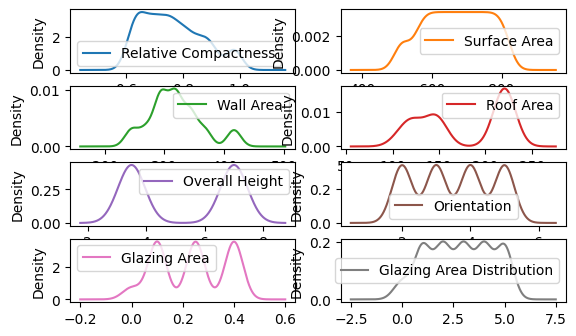

In [19]:
df.iloc[:,:8].plot(kind='kde', subplots=True, layout=(5,2),sharex=False, sharey=False)
plt.show()

### 3.1.1. Visualisation of Features before scaling:

#### Normalize Feature Columns only (Non-Gaussian to Gaussian conversion):

We normalize data here because Data are not in one scale.
 We will use Gaussian Standard Distribution 

In [20]:
df_copy = df.copy()

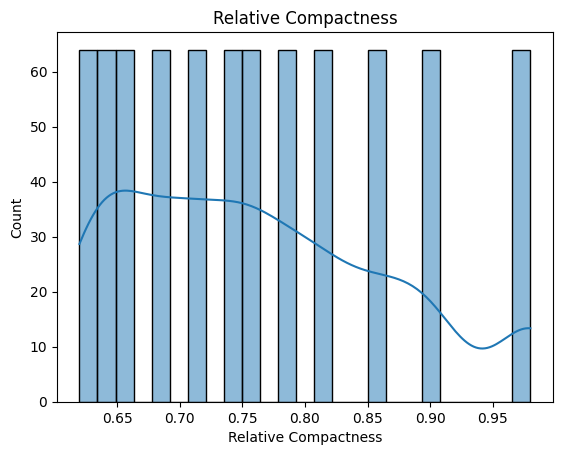

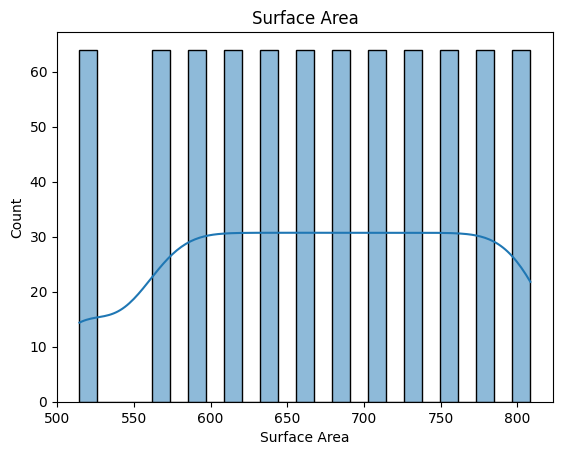

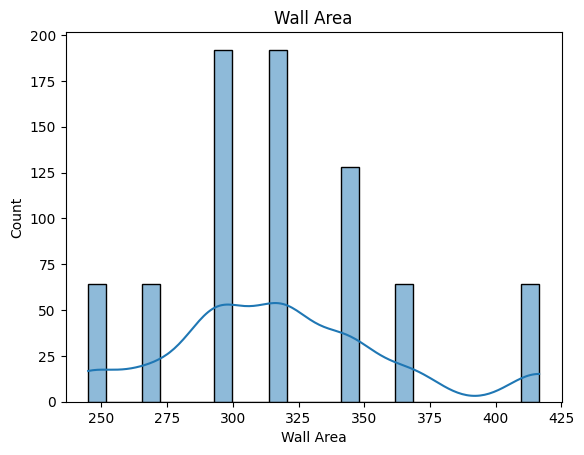

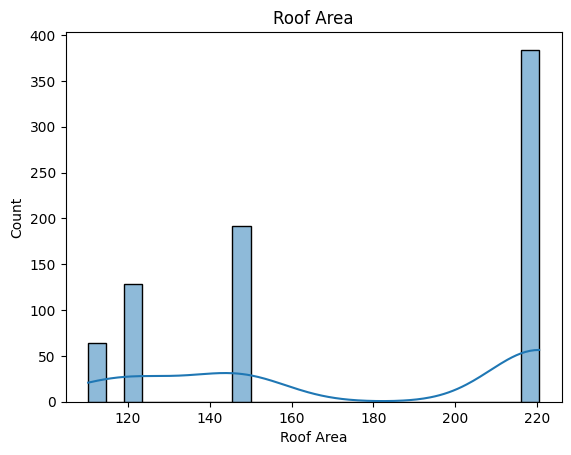

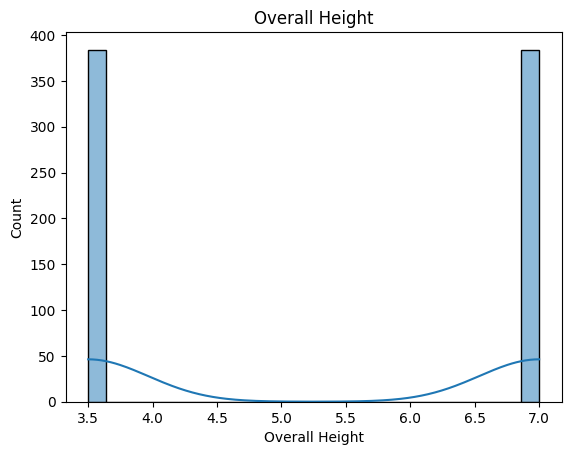

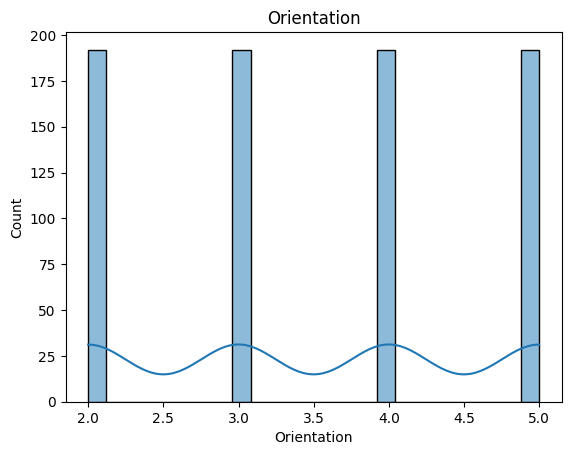

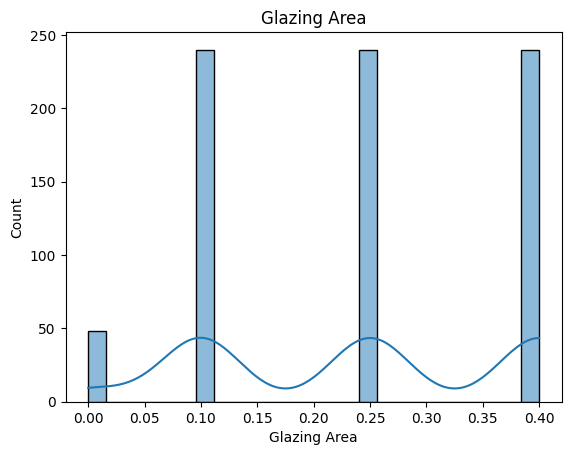

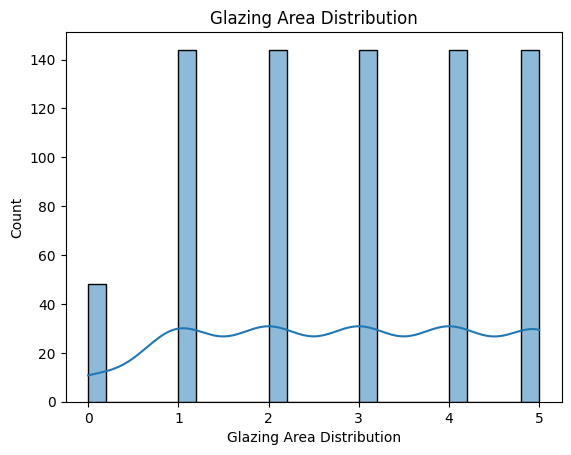

In [21]:
# Checking distribution curve for each features before normalization:
norm_cols = ["Relative Compactness","Surface Area","Wall Area",
             "Roof Area", "Overall Height","Orientation",
             "Glazing Area","Glazing Area Distribution"]
for feature in norm_cols:
    sns.histplot(data=df_copy.iloc[:,:8][feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show()   

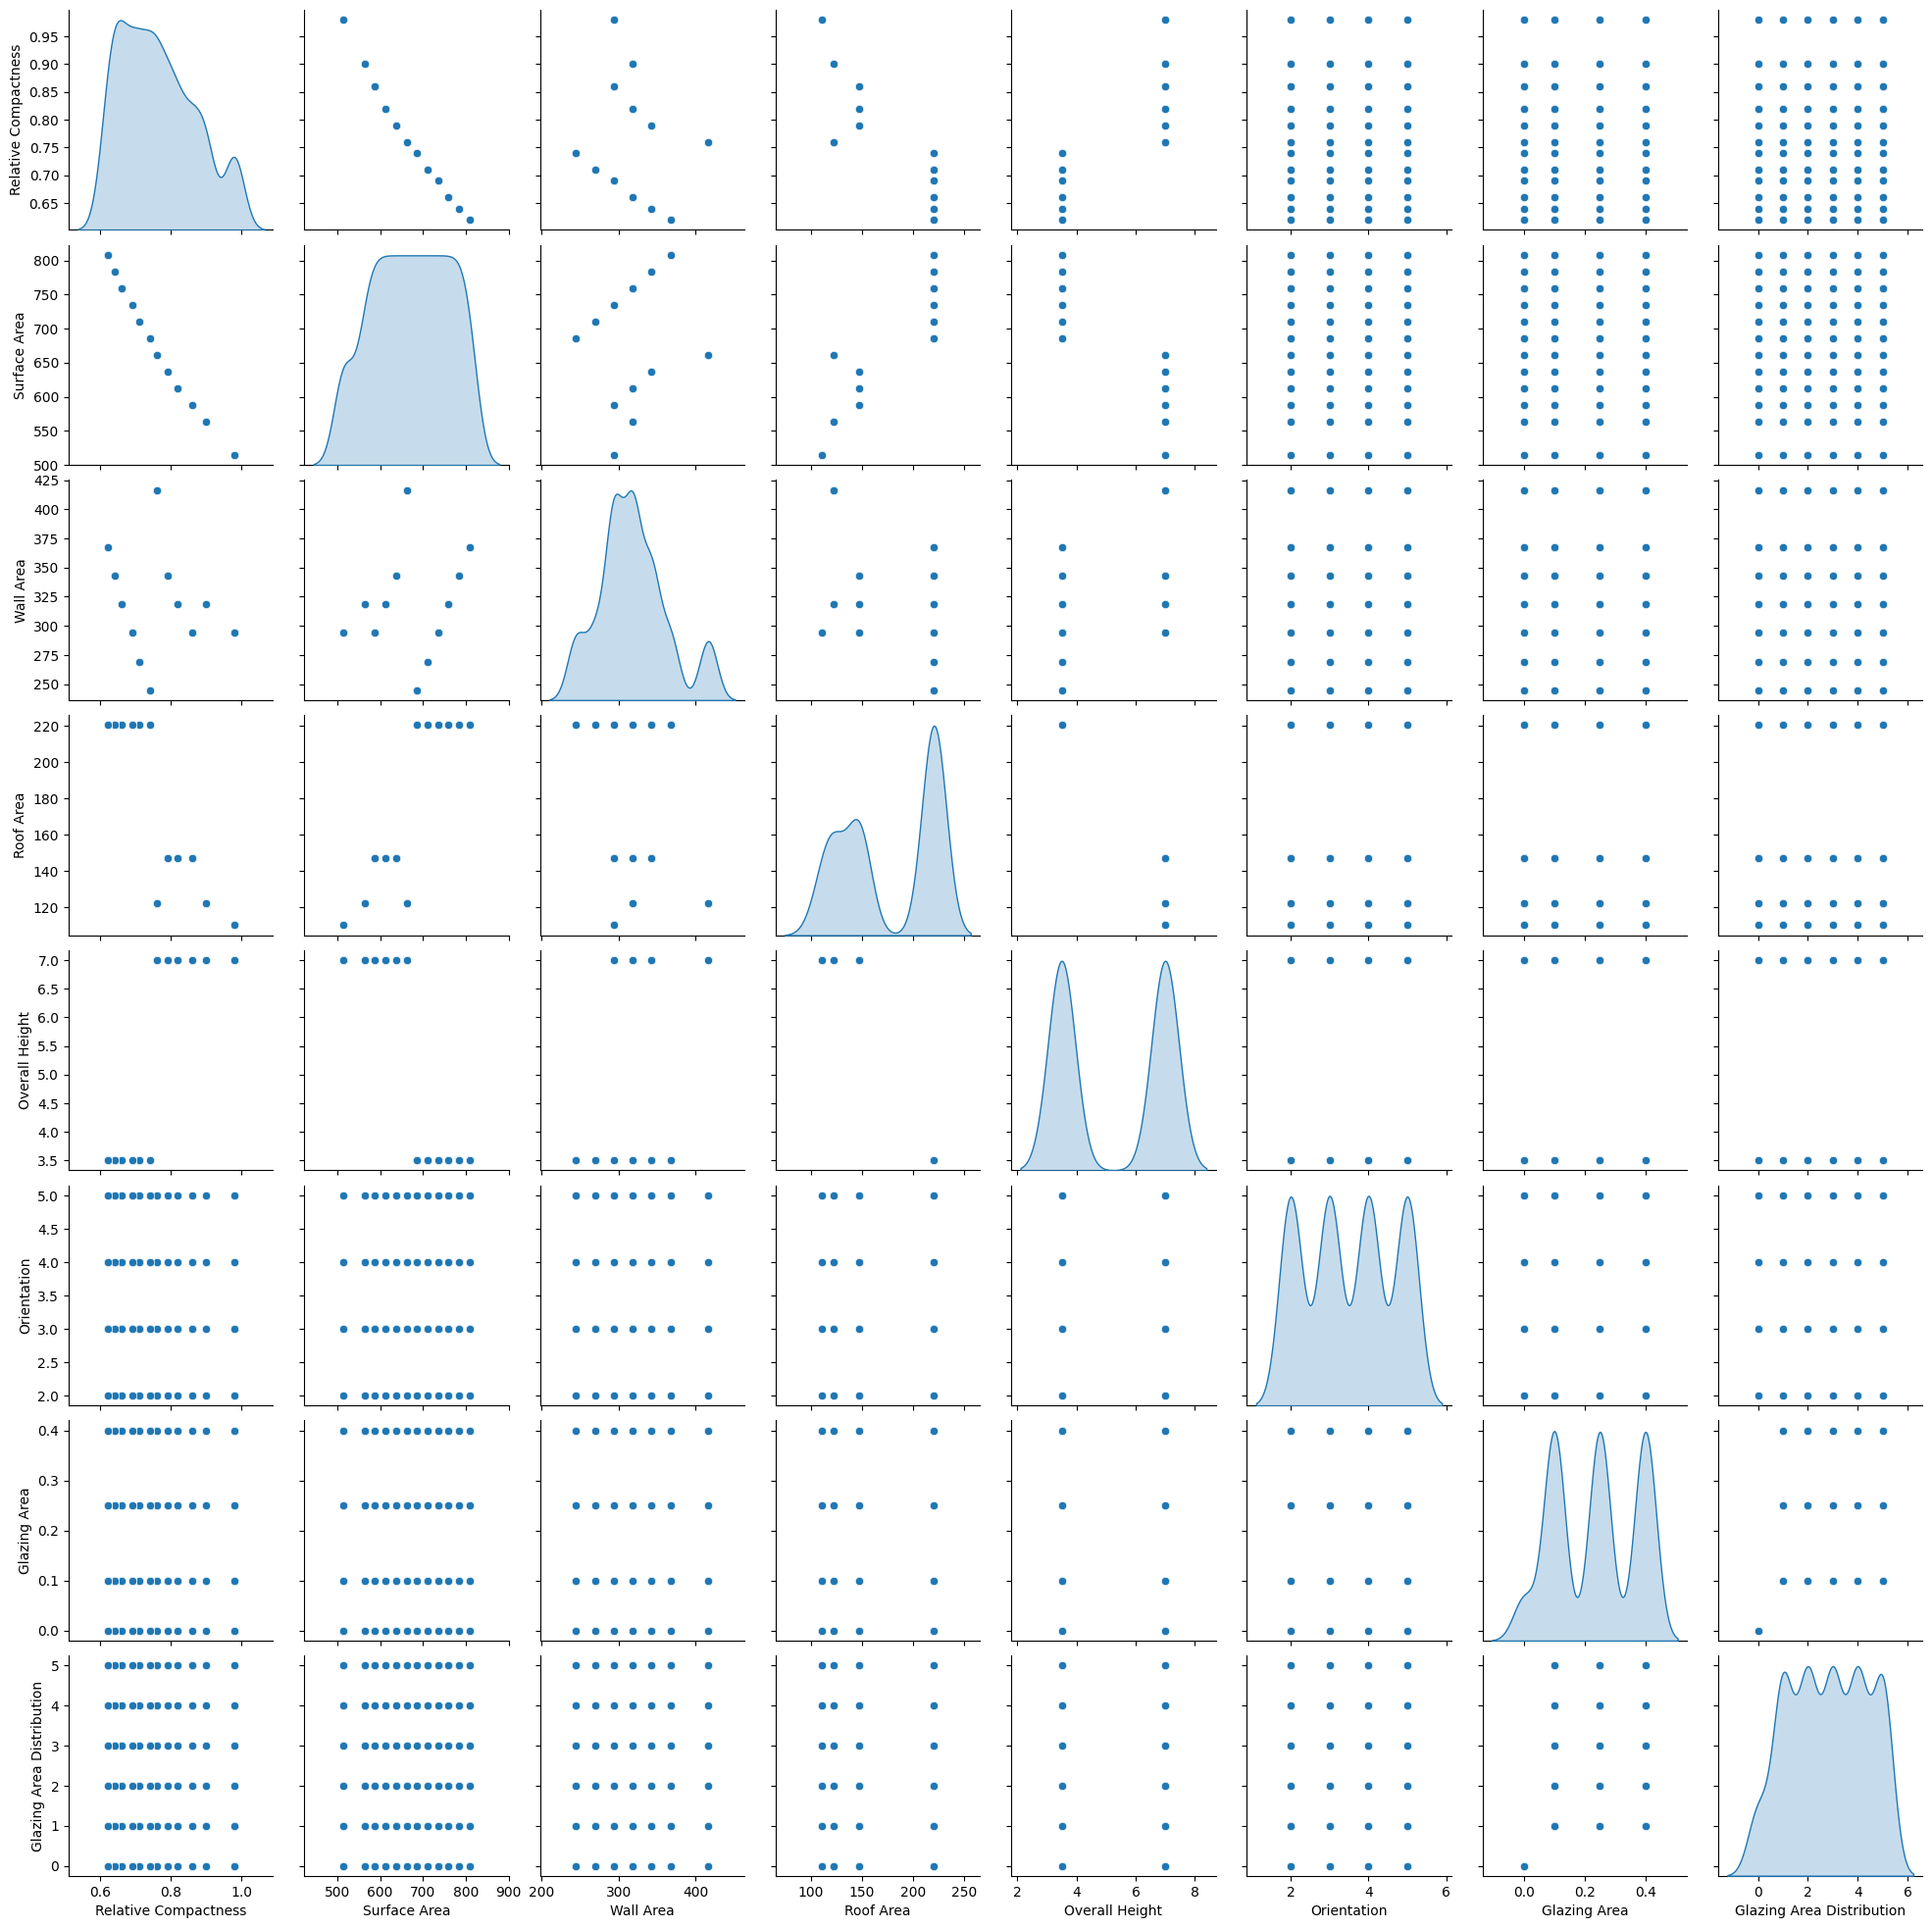

In [22]:
sns.pairplot(df_copy.iloc[:,:8], kind="scatter", diag_kind='kde')
plt.show()

### 3.1.2. Visualisation of Features after scaling:

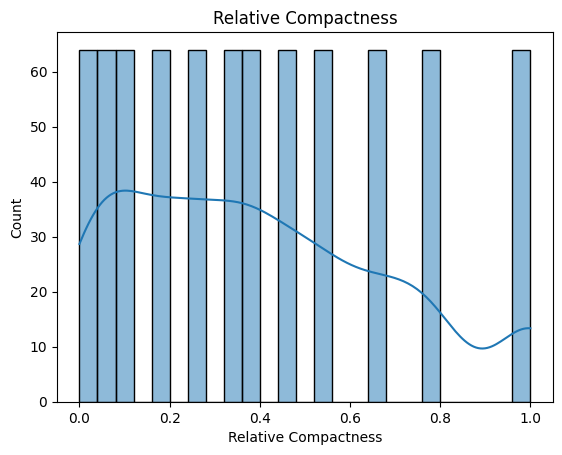

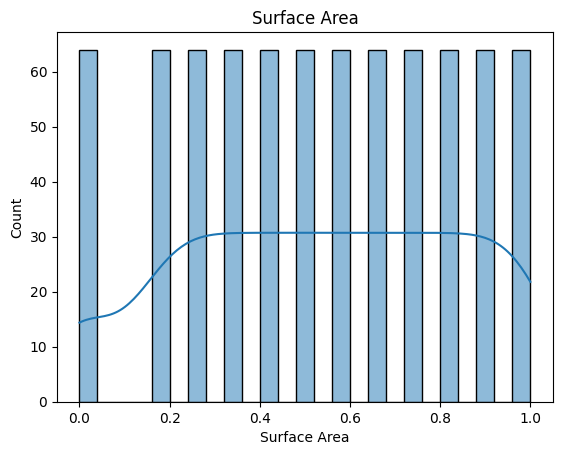

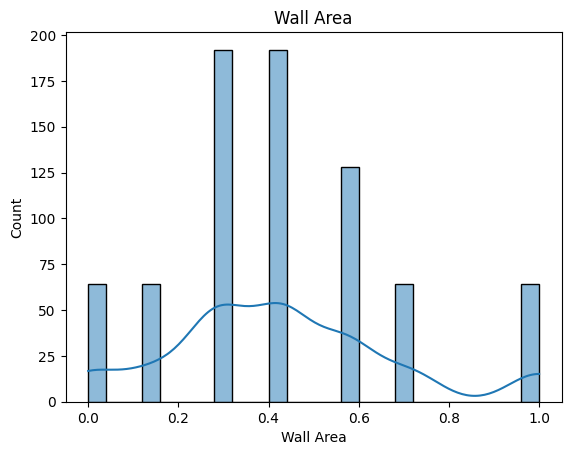

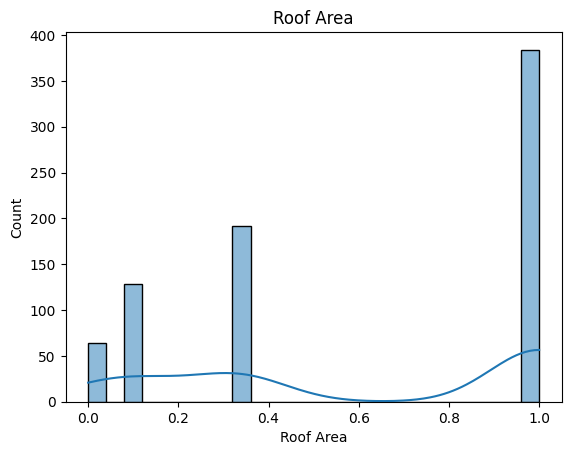

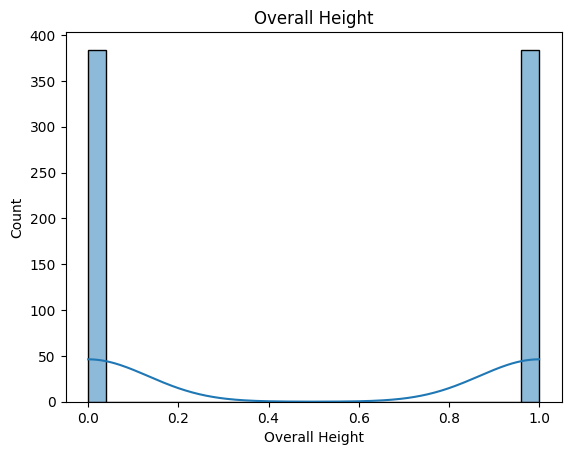

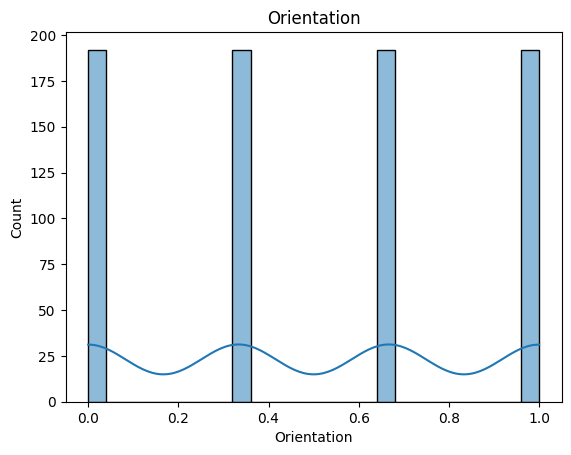

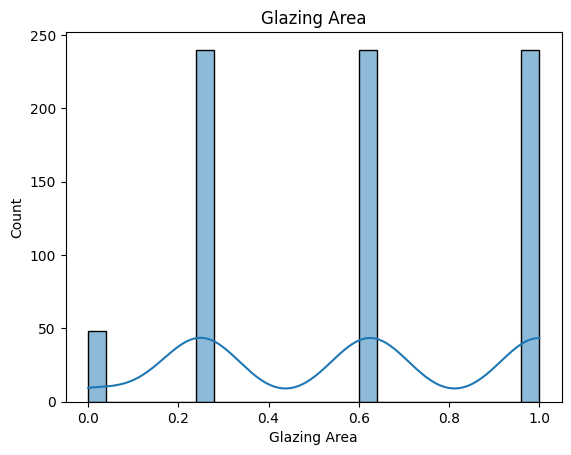

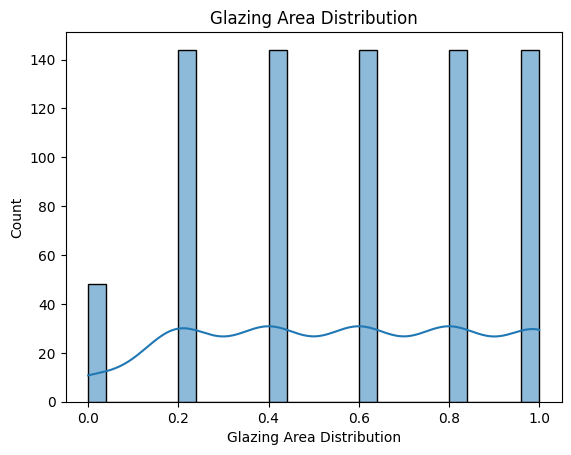

In [23]:
# Checking distribution curve for each features after normalization:
norm_cols = ["Relative Compactness","Surface Area","Wall Area",
             "Roof Area", "Overall Height","Orientation",
             "Glazing Area","Glazing Area Distribution"]

df_normal = (df_copy.iloc[:,:8] - df_copy.iloc[:,:8].min())/(df_copy.iloc[:,:8].max()- df_copy.iloc[:,:8].min())


for feature in norm_cols:
    sns.histplot(data=df_normal[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show()

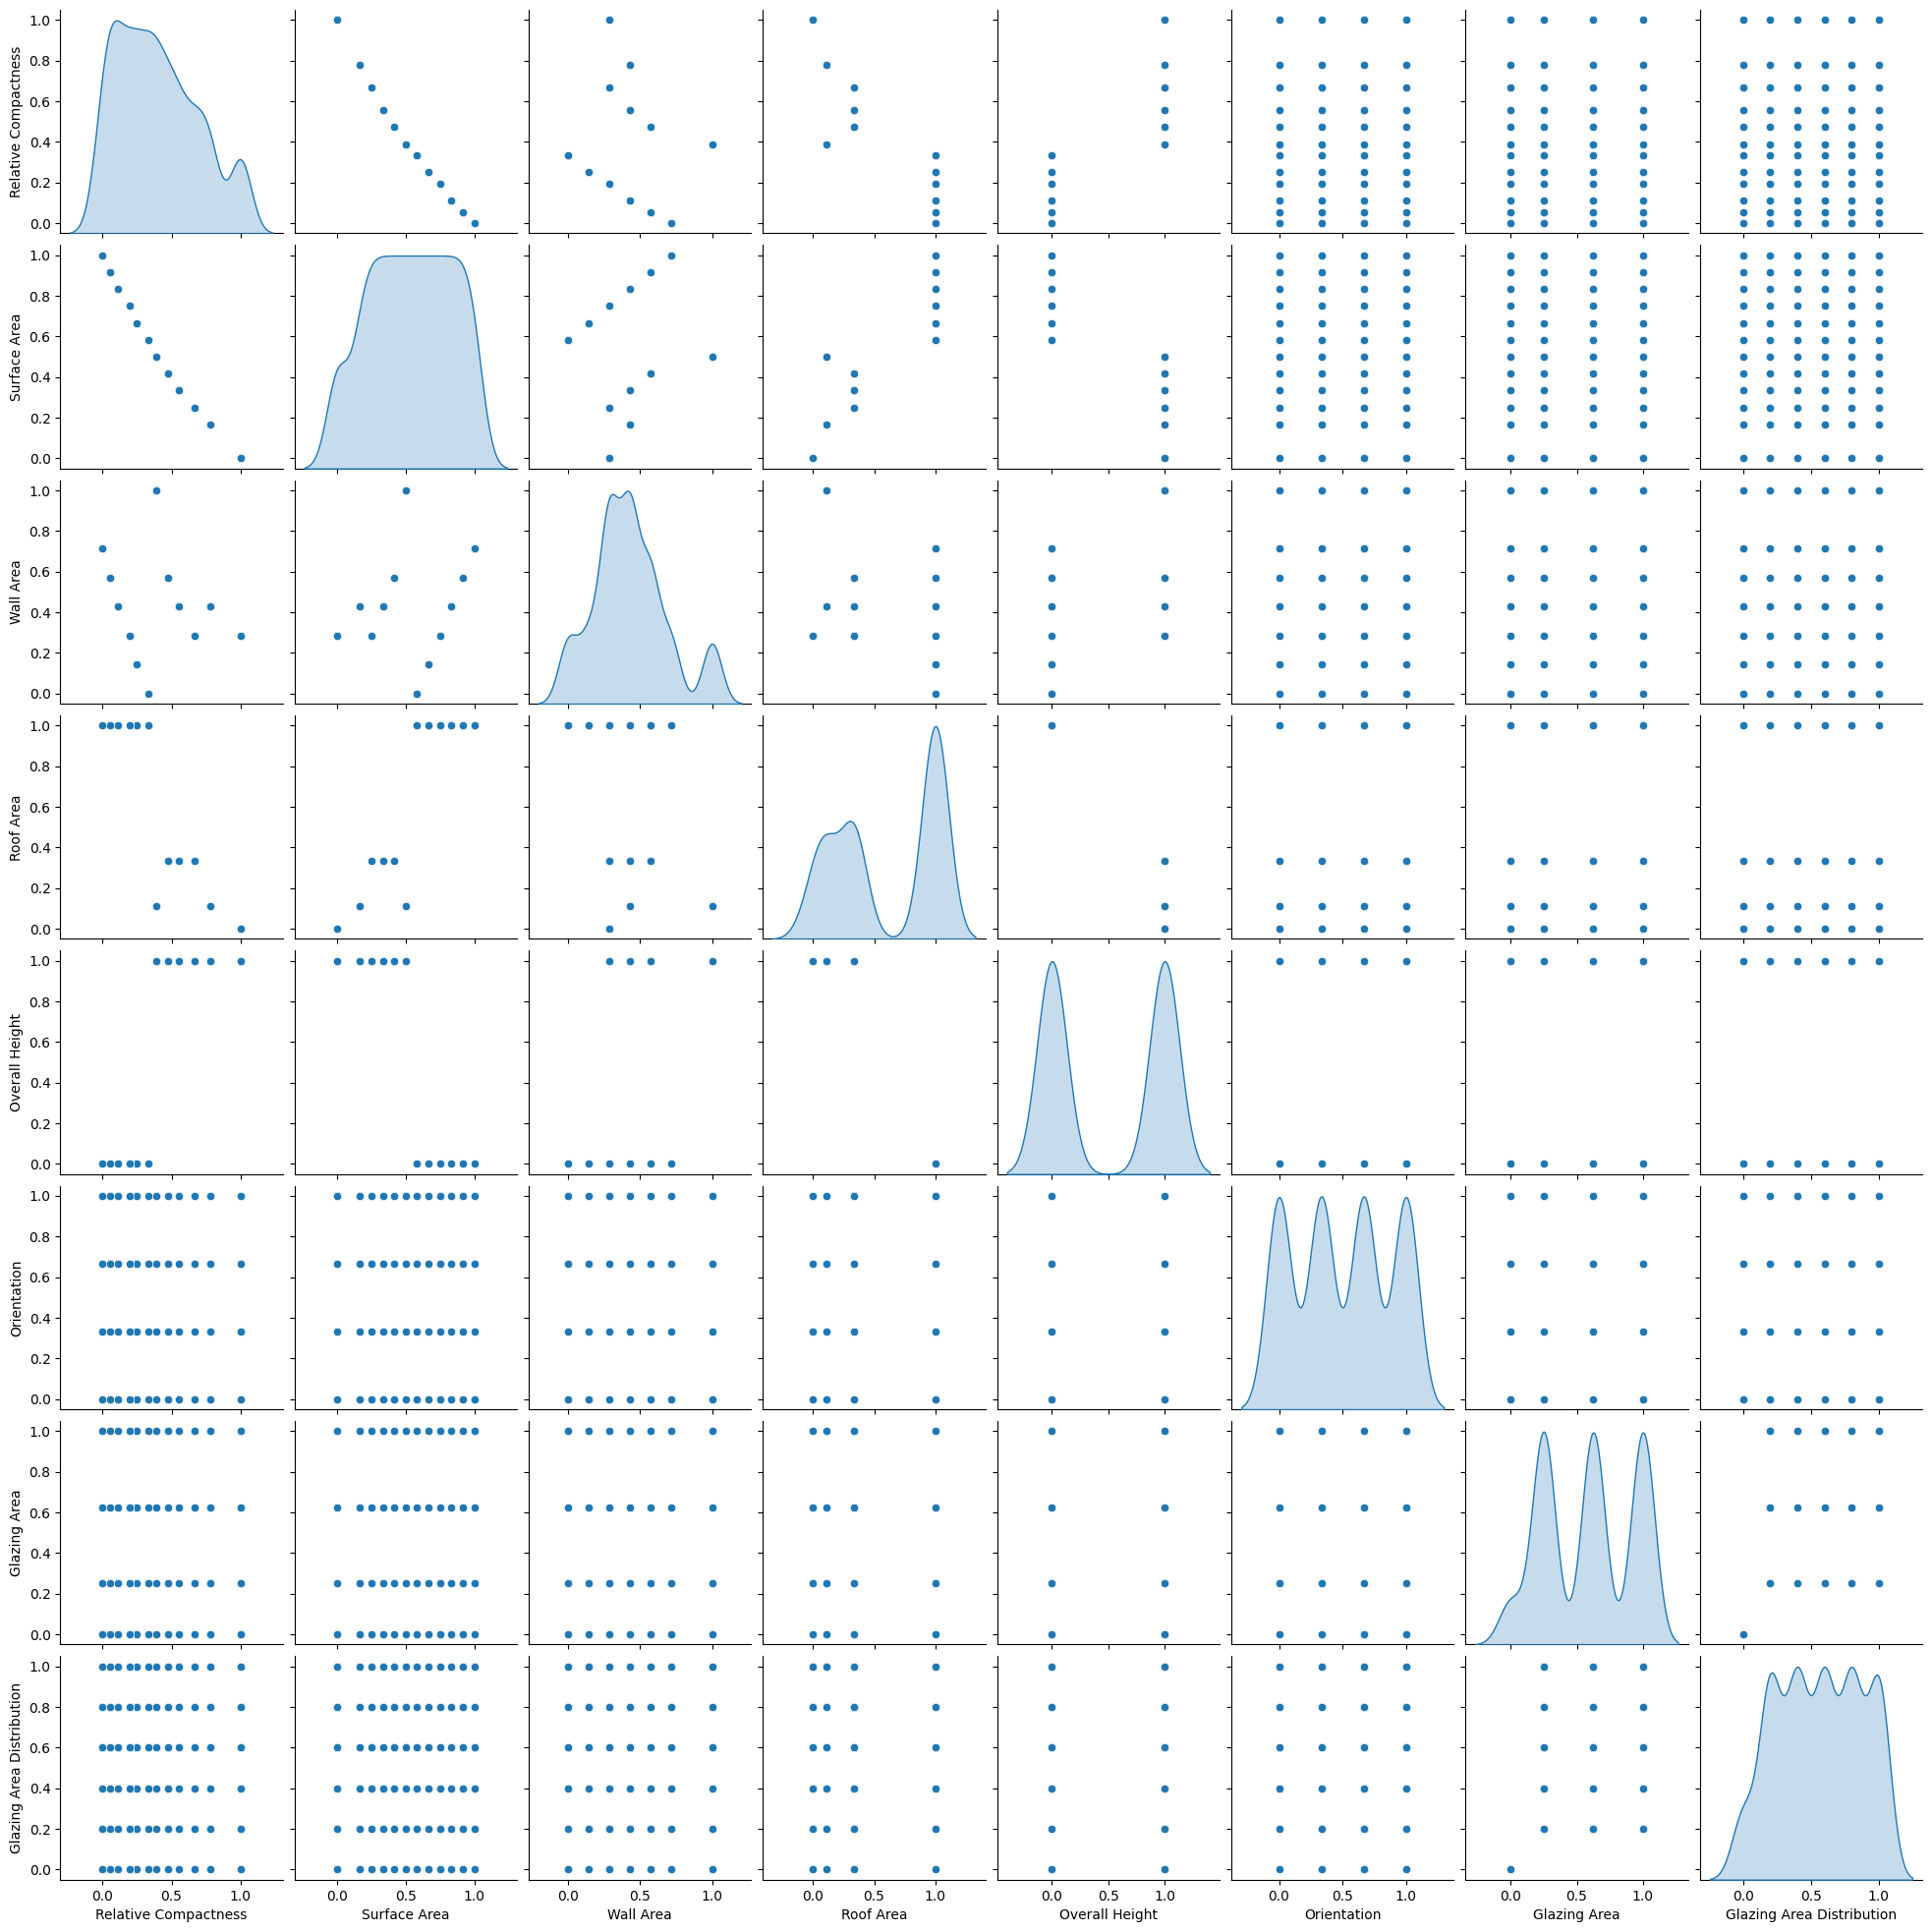

In [24]:
sns.pairplot(df_normal.iloc[:,:8], kind="scatter", diag_kind='kde')
plt.show()

# 4. Model Training and Testing without Hyper Parameter Tuning:

## 4.1. Sepearation of Input Features and Output Features:

In [15]:
# Splitting X and y for all Experiments:

df_copy = df.copy()

TARGET_COLUMN = ["Heating Load", "Cooling Load"]

X = df_copy.drop(columns=TARGET_COLUMN, axis=1)

y = df_copy[TARGET_COLUMN]

In [17]:
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [18]:
y

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


## 4.2. Creating Useful  Functions:

### 4.2.1. Metric Performance Function:

In [26]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: MAE, MSE, RMSE, r2score
    '''
    MAE = mean_absolute_error(true, predicted) # Calculate Mean Absolute Error
    MSE = mean_squared_error(true, predicted) # Calculate Mean Squared Error
    RMSE =np.sqrt(MSE) # Calculate Root Mean Squared Error
    r2score = r2_score(true, predicted)  # Calculate R_squaredScore/R2score
    return MAE, MSE, RMSE, r2score

### 4.2.2. Dictionary of Regression Type Machine Learning Models:

In [27]:
# Dictionary which contains models for experiment
models = {
    "Linear Regresson": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor ": Lasso(),
    "Elastic Net Regressor": ElasticNet(),
    "SVR": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
    }

### 4.2.3. Model Evaluation Function without Hyper Parameters Tuning:

In [28]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics.
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    # Applying Satndard Normalization method (Z-Score Equation):
    scalar = StandardScaler()
    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)
    
    models_list = []
    MAE_train_list = []
    MAE_test_list = []
    MSE_train_list = []
    MSE_test_list = []
    RMSE_train_list = []
    RMSE_test_list = []
    r2score_train_list = []
    r2score_test_list = []
    r2score_diff = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        wrapper = MultiOutputRegressor(model)
        wrapper.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = wrapper.predict(X_train)
        y_test_pred = wrapper.predict(X_test)

        # Training set performance
        model_train_MAE, model_train_MSE, model_train_RMSE,\
        model_train_r2score = evaluate_clf(y_train ,y_train_pred)
        
        MAE_train_list.append(model_train_MAE)
        MSE_train_list.append(model_train_MSE)
        RMSE_train_list.append(model_train_RMSE)
        r2score_train_list.append(model_train_r2score*100)
    
        # Test set performance
        model_test_MAE,model_test_MSE,model_test_RMSE,\
        model_test_r2score = evaluate_clf(y_test, y_test_pred)
        
        MAE_test_list.append(model_test_MAE)
        MSE_test_list.append(model_test_MSE)
        RMSE_test_list.append(model_test_RMSE)
        r2score_test_list.append(model_test_r2score*100)
        
        # r2score_train_test_difference
        r2score_diff.append(max(model_train_r2score, model_test_r2score) - 
                            min(model_train_r2score, model_test_r2score))  
    
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MAE: {:.4f}".format(model_train_MAE))
        print('- MSE: {:.4f}'.format(model_train_MSE)) 
        print('- RMSE: {:.4f}'.format(model_train_RMSE))
        print('- r2score: {:.4f}'.format(model_train_r2score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MAE: {:.4f}'.format(model_test_MAE))
        print('- MSE: {:.4f}'.format(model_test_MSE))
        print('- RMSE: {:.4f}'.format(model_test_RMSE))
        print('- r2score: {:.4f}'.format(model_test_r2score))
        
        print('='*35)
        print('\n')    
        
    report = pd.DataFrame(list(zip(models_list, MAE_train_list, MAE_test_list, MSE_train_list, 
                                   MSE_test_list, RMSE_train_list, RMSE_test_list, r2score_train_list, 
                                   r2score_test_list, r2score_diff)), 
                          columns=['Model Name', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'RMSE_train',
                                   'RMSE_test', 'r2score_train', 'r2score_test','r2score_diff']).sort_values(by='r2score_test',ascending=False)
        
    return report

## 4.3. Model Evaluation Results:

### 4.3.1. Metric Performance for Considered Machine Learning Models:

In [29]:
report_Load = evaluate_models(X, y, models)

Linear Regresson
Model performance for Training set
- MAE: 2.1487
- MSE: 9.3503
- RMSE: 3.0578
- r2score: 0.9010
----------------------------------
Model performance for Test set
- MAE: 2.1749
- MSE: 9.5298
- RMSE: 3.0870
- r2score: 0.9027


Ridge Regressor
Model performance for Training set
- MAE: 2.1483
- MSE: 9.3150
- RMSE: 3.0520
- r2score: 0.9013
----------------------------------
Model performance for Test set
- MAE: 2.1933
- MSE: 9.5755
- RMSE: 3.0944
- r2score: 0.9022


Lasso Regressor 
Model performance for Training set
- MAE: 2.6025
- MSE: 12.5486
- RMSE: 3.5424
- r2score: 0.8672
----------------------------------
Model performance for Test set
- MAE: 2.6511
- MSE: 13.0882
- RMSE: 3.6178
- r2score: 0.8662


Elastic Net Regressor
Model performance for Training set
- MAE: 3.1020
- MSE: 17.2656
- RMSE: 4.1552
- r2score: 0.8179
----------------------------------
Model performance for Test set
- MAE: 3.2358
- MSE: 18.5970
- RMSE: 4.3124
- r2score: 0.8102


SVR
Model performance fo

###  4.3.2. Metric Evaluation for Considered Machine Learning Models in Tabular Format:

In [30]:
report_Load

,Model Name,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,r2score_train,r2score_test,r2score_diff
8,XGBRegressor,4.748097e-02,0.350533,5.928454e-03,0.359167,7.699646e-02,0.599305,99.993510,99.621011,0.003725
7,Gradient Boosting,5.964579e-01,0.721725,9.385866e-01,1.279404,9.688068e-01,1.131108,98.963927,98.635106,0.003288
10,Random Forest Regressor,2.386704e-01,0.724825,2.018636e-01,1.684437,4.492923e-01,1.297858,99.776799,98.196433,0.015804
9,Decision Tree Regressor,4.339634e-18,0.781623,7.708738e-33,2.239462,8.779942e-17,1.496483,100.000000,97.606319,0.023937
6,AdaBoost Regressor,1.648625e+00,1.728891,4.161372e+00,4.542788,2.039944e+00,2.131382,95.580427,95.338176,0.002423
5,K-Neighbors Regressor,1.256062e+00,1.553182,3.697868e+00,5.984724,1.922984e+00,2.446370,96.078082,93.858462,0.022196
4,SVR,1.811439e+00,2.007057,8.049471e+00,9.296872,2.837159e+00,3.049077,91.450673,90.443942,0.010067
0,Linear Regresson,2.148712e+00,2.174872,9.350314e+00,9.529811,3.057828e+00,3.087039,90.097615,90.267191,0.001696
1,Ridge Regressor,2.148260e+00,2.193320,9.314977e+00,9.575502,3.052045e+00,3.094431,90.132503,90.217784,0.000853
2,Lasso Regressor,2.602506e+00,2.651077,1.254863e+01,13.088237,3.542405e+00,3.617767,86.723707,86.619043,0.001047


# 5. Model Training & Testing with Hyper Parameters Tuning:

## 5.1. Creating Useful  Functions:

### 5.1.1. Model function with Hyper Parameters:

In [10]:
def create_model_tuned(X, y, plot=True, save_results=True):
    
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics.
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    # Applying Satndard Normalization method (Z-Score Equation):
    scalar = StandardScaler()
    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)
    
    names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_scores = []
    test_r2_scores = []
    best_params = []
  

    # Hypertuning Parameters:

    ridge_params = {"estimator__alpha": 10**np.linspace(10,-2,100)*0.5}

    lasso_params = {"estimator__alpha": 10**np.linspace(10,-2,100)*0.5}

    enet_params = {"estimator__alpha": 10**np.linspace(10,-2,100)*0.5}
    
    svr_params = {'estimator__C': [0.01,0.1,1,10,100], 
                'estimator__epsilon': [0.01,0.1,1,10,100]}

    knn_params = {"estimator__n_neighbors": [2,4,6,8,10,12]}


    grad_boost_params = {'estimator__learning_rate': [0.1,1,10,100], 
                       'estimator__n_estimators': [5,10,20,50]}


    xgboost_params = {"estimator__colsample_bytree": [0.4, 0.5 ,0.6,0.8],
                    "estimator__n_estimators": [200, 500, 1000],
                    "estimator__max_depth": [3,5,8],
                    "estimator__learning_rate": [0.1, 0.01, 0.001]}

    dt_params = {"estimator__min_samples_split": range(2,100),
               "estimator__max_leaf_nodes": range(2,10),
               "estimator__max_depth": [2,4,6,8,10]}

    rf_params = {"estimator__max_depth": [2,4,6,8,10],
               "estimator__max_features": [2,4,6,8,10],
               'estimator__max_leaf_nodes':[2,4,6,8,10],
               "estimator__min_samples_split": [8, 15, 20],
               "estimator__n_estimators": [200, 500]}

    regressors = [("Ridge", Ridge(), ridge_params),
                ("Lasso", Lasso(max_iter = 10000), lasso_params),
                ("ElasticNet", ElasticNet(), enet_params),
                ("SVR", SVR(), svr_params), 
                ("K-Neighbors Regressor", KNeighborsRegressor(), knn_params),
                ("Gradient Boosting", GradientBoostingRegressor(),grad_boost_params),
                ("XGBoost Regressor", XGBRegressor(objective="reg:squarederror"), xgboost_params),
                ("Decision Tree Regressor", DecisionTreeRegressor(), dt_params),
                ("Random Forest Regressor", RandomForestRegressor(), rf_params)]

    for name, regressor, params in regressors:
        print(f"#################### {name} ####################")

        gs_best = GridSearchCV(MultiOutputRegressor(regressor), params, cv = 3, n_jobs=-1, verbose=False).fit(X_train, y_train)

        final_model = MultiOutputRegressor(regressor).set_params(**gs_best.best_params_).fit(X_train, y_train)
        train_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
        test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))
        train_rmse_results.append(train_rmse_result)
        test_rmse_results.append(test_rmse_result)
        train_r2_score = final_model.score(X_train, y_train)
        test_r2_score = final_model.score(X_test, y_test)
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)
        print(f"RMSE_Train: {round(train_rmse_result, 4)} , RMSE_Test: {round(test_rmse_result, 4)} , R2_Train: {round(train_r2_score, 3)} , R2_Test: {round(test_r2_score, 3)} (Tuned Model) ({name}) ")

        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_params.append(gs_best.best_params_)
        names.append(name)

    model_tuned_results = pd.DataFrame({'Model_Names': names,
                                        'R2_score_Train': train_r2_scores,
                                        'R2_score_Test': test_r2_scores,
                                        "best_params": best_params
                                }).set_index("Model_Names")
    model_tuned_results=model_tuned_results.sort_values(by='R2_score_Test', ascending=False)
    print(model_tuned_results)

    if plot:
        plt.figure(figsize=(15, 12))
        sns.barplot(x='R2_score_Test', y=model_tuned_results.index, data=model_tuned_results, color="r")
        plt.xlabel('R2_score_Test Values')
        plt.ylabel('Model Names')
        plt.title('R2_score_Test for All Models')
        plt.show()

    if save_results:
        model_tuned_results.to_csv("model_tuned_results.csv")

    return model_tuned_results

# 5.2. Model Evaluation Results:

### 5.2.1. Metric Performance and Best Parameters for Considered Machine Learning Models:

#################### Ridge ####################
RMSE_Train: 3.0648 , RMSE_Test: 3.1625 , R2_Train: 0.901 , R2_Test: 0.903 (Tuned Model) (Ridge) 
Ridge best params: {'estimator__alpha': 0.10772173450159389}

#################### Lasso ####################
RMSE_Train: 3.065 , RMSE_Test: 3.1649 , R2_Train: 0.901 , R2_Test: 0.902 (Tuned Model) (Lasso) 
Lasso best params: {'estimator__alpha': 0.005}

#################### ElasticNet ####################
RMSE_Train: 3.0675 , RMSE_Test: 3.1666 , R2_Train: 0.901 , R2_Test: 0.902 (Tuned Model) (ElasticNet) 
ElasticNet best params: {'estimator__alpha': 0.005}

#################### SVR ####################
RMSE_Train: 1.4926 , RMSE_Test: 3.636 , R2_Train: 0.987 , R2_Test: 0.98 (Tuned Model) (SVR) 
SVR best params: {'estimator__C': 100, 'estimator__epsilon': 0.1}

#################### K-Neighbors Regressor ####################
RMSE_Train: 2.5545 , RMSE_Test: 3.6305 , R2_Train: 0.954 , R2_Test: 0.94 (Tuned Model) (K-Neighbors Regressor) 
K-Neighbors

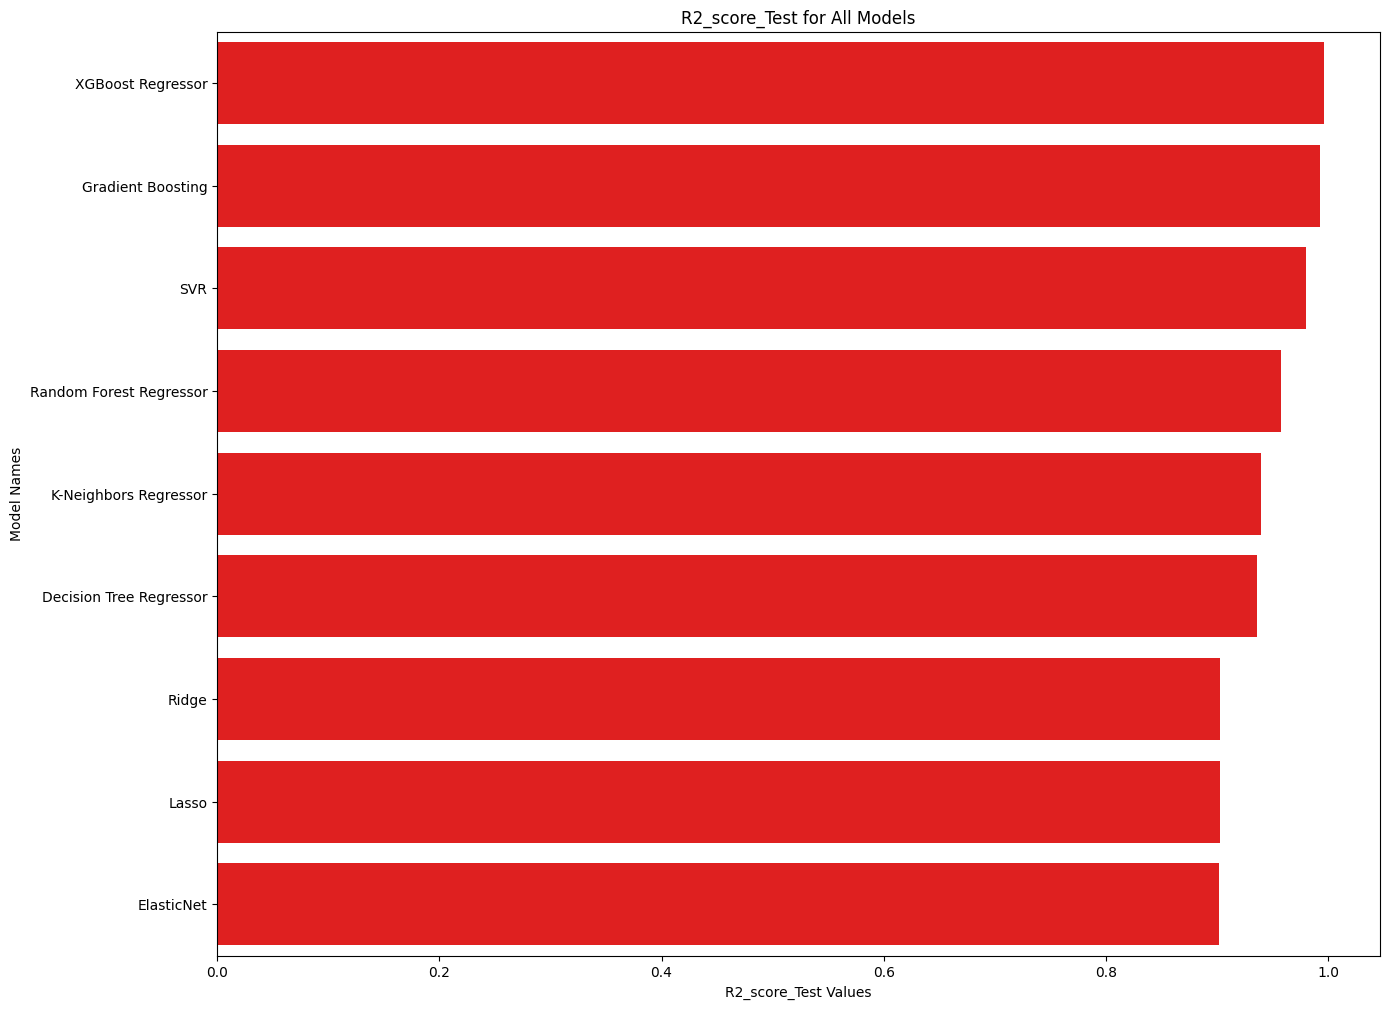

In [49]:
# For Heating as well as Cooling Load:
model_tuned_results = create_model_tuned(X, y, plot=True, save_results=True)

## 5.3. Comparing Selected Model Accuracy with or without Hyper Pramaters Tuning:

In [63]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model Name", "Hyperparameter Tuning","r2 Score_Train (%)", "r2 score_Test (%)"]
pt.add_row(["XGBClassifier", "No","99.994","99.621"])
pt.add_row(["XGBClassifier", "Yes","99.984","99.664"])
print(pt)

+---------------+-----------------------+--------------------+-------------------+
|   Model Name  | Hyperparameter Tuning | r2 Score_Train (%) | r2 score_Test (%) |
+---------------+-----------------------+--------------------+-------------------+
| XGBClassifier |           No          |       99.994       |       99.621      |
| XGBClassifier |          Yes          |       99.984       |       99.664      |
+---------------+-----------------------+--------------------+-------------------+


# 6. Final Model Creation:

## 6.1. Training and Testing XGBoost Multi-Regressor Model:

In [23]:
regressor = XGBRegressor(learning_rate = 0.1, n_estimators = 1000, max_depth = 8, colsample_bytree = 0.4)
final_model = MultiOutputRegressor(regressor)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

scalar = RobustScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

final_model= final_model.fit(X_train, y_train)
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

print("Final XGBoost Regressor Accuracy Score (Train) :", r2_score(y_pred_train,y_train))
print("Final XGBoost Regressor Accuracy Score (Test) :", r2_score(y_pred_test,y_test))

Final XGBoost Regressor Accuracy Score (Train) : 0.999835531247313
Final XGBoost Regressor Accuracy Score (Test) : 0.9966752701934964


## 6.2. Prediction Using XGBoost Multi-Regressor Model:

In [41]:
print("Input: \n")
print(X_test[0])
y_predict = final_model.predict([X_test[0]])
print("--"*40)
print("Output: ")
f" Heating Load: {y_predict[0][0]:0,.3f} kW, Cooling Load: {y_predict[0][1]:0,.3f} kW"

Input: 

[-0.75        0.83333333  1.          0.          0.         -2.
  0.5         0.        ]
--------------------------------------------------------------------------------
Output: 


' Heating Load: 14.866 kW, Cooling Load: 16.587 kW'

## The Best Model is XGBoost Regressor with 99.67% accuracy.

# Thank You !!!